## Scala's real-world project repository data

This project has been done as a part of my Data Science career path on DataCamp, to investigate contribution of each developer in open-source Scala project on GitHub during 2011-2018.

Datasets that are used in this projects have been previously mined and extracted from GitHub: 
<li><code>pulls_2011-2013.csv</code> contains the basic information about the pull requests, and spans from the end of 2011 up to (but not including) 2014.</li>
<li><code>pulls_2014-2018.csv</code> contains identical information, and spans from 2014 up to 2018.</li>
<li><code>pull_files.csv</code> contains the files that were modified by each pull request.</li>
</ol>

## Table of content

1. Importing libraries
2. Data cleaning 
3. Exploratory Data Analysis

##  1. Importing libraries

In [21]:
#importing needed libraries
import numpy as np
import pandas as pd

In [5]:
#Creating DataFrames from csv files
pulls_one = pd.read_csv('datasets/pulls_2011-2013.csv')
pulls_two = pd.read_csv('datasets/pulls_2014-2018.csv')
pull_files = pd.read_csv('datasets/pull_files.csv')

print(pull_files)

             pid                                               file
0      163314316                    test/files/pos/t5638/Among.java
1      163314316                   test/files/pos/t5638/Usage.scala
2      163314316                         test/files/pos/t9291.scala
3      163314316                         test/files/run/t8348.check
4      163314316              test/files/run/t8348/TableColumn.java
...          ...                                                ...
85583     547354                       test/files/run/bitsets.check
85584     547354                       test/files/run/bitsets.scala
85585     547150  src/compiler/scala/tools/nsc/transform/LiftCod...
85586     547150          src/library/scala/reflect/api/Trees.scala
85587     547003                                         README.rst

[85588 rows x 2 columns]


## 2. Data cleaning

In [4]:
# Appending pulls_one to pulls_two
pulls = pd.concat([pulls_one, pulls_two])

# Converting the date for the pulls object
pulls['date'] = pd.to_datetime(pulls["date"], utc=True)

# Merging two DataFrames together
data = pd.merge(pulls, pull_files, on="pid")

print(data)

            pid         user                      date  \
0      11166973  VladimirNik 2013-12-31 23:10:55+00:00   
1      11166973  VladimirNik 2013-12-31 23:10:55+00:00   
2      11166973  VladimirNik 2013-12-31 23:10:55+00:00   
3      11166973  VladimirNik 2013-12-31 23:10:55+00:00   
4      11161892      Ichoran 2013-12-31 16:55:47+00:00   
...         ...          ...                       ...   
85583  11231462      rklaehn 2014-01-04 22:42:02+00:00   
85584  11188295      rklaehn 2014-01-02 18:55:33+00:00   
85585  11188295      rklaehn 2014-01-02 18:55:33+00:00   
85586  11188295      rklaehn 2014-01-02 18:55:33+00:00   
85587  11188295      rklaehn 2014-01-02 18:55:33+00:00   

                                                    file  
0           src/reflect/scala/reflect/api/Printers.scala  
1      src/reflect/scala/reflect/internal/Printers.scala  
2                        test/files/run/reify_ann3.check  
3      test/junit/scala/reflect/internal/PrintersTest...  
4      s

## 3. Exploratory Data Analysis - EDA


### Checking if project is still actively maintained? 

<AxesSubplot:xlabel='month,year'>

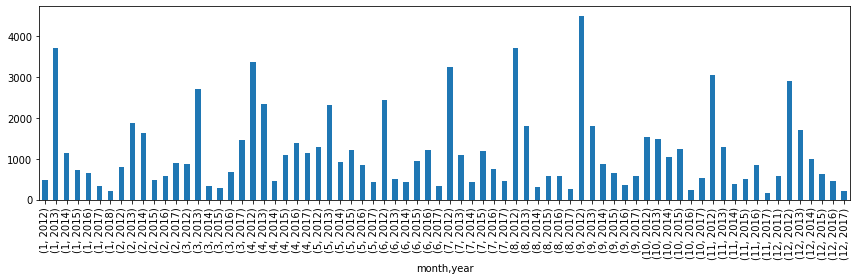

In [128]:
# Required for matplotlib
%matplotlib inline

# Creating columns that will store the month and the year
data['month'] = data["date"].dt.month
data['year'] = data["date"].dt.year

# Grouping by the month and year and counting the pull requests
counts = data.groupby(["month", "year"])["pid"].count()

# Count plot to see result
counts.plot(kind='bar', figsize = (12,4))

### Number of pull requests submitted by each user

array([[<AxesSubplot:title={'center':'pid'}>]], dtype=object)

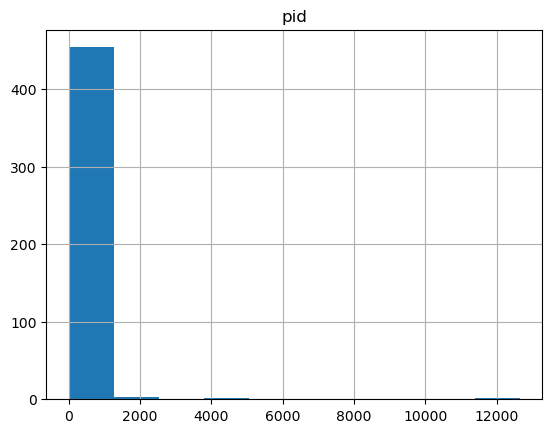

In [9]:
# Required for matplotlib
%matplotlib inline

# Grouping by the submitter
by_user = data.groupby('user').agg({'pid': 'count'})

# Plotting the histogram
by_user.hist()

### What files were changed in the last ten pull requests?

In [12]:
# Identifying the last 10 pull requests
last_10 = pulls.nlargest(10, "pid")

# Joining the two data sets together
joined_pr = pd.merge(last_10, pull_files, on="pid")

# Identifying the unique files
files = set(joined_pr["file"])

# Printing the results
print(files)

{'src/reflect/scala/reflect/internal/pickling/ByteCodecs.scala', 'src/compiler/scala/tools/nsc/backend/jvm/analysis/BackendUtils.scala', 'test/files/pos/leibniz_liskov.scala', 'test/files/neg/leibniz-liskov.scala', 'src/compiler/scala/tools/nsc/backend/jvm/PostProcessor.scala', 'test/files/pos/t10568/Impl.scala', 'test/files/pos/t5638/Among.java', 'src/compiler/scala/tools/nsc/backend/jvm/BCodeHelpers.scala', 'src/library/scala/util/Properties.scala', 'src/scalap/decoder.properties', 'src/compiler/scala/tools/nsc/typechecker/Contexts.scala', 'test/files/neg/leibniz-liskov.check', 'test/files/run/t8348.check', 'src/library/scala/Predef.scala', 'src/compiler/scala/reflect/reify/phases/Calculate.scala', 'doc/LICENSE.md', 'test/files/pos/t10686.scala', 'doc/License.rtf', 'src/compiler/scala/tools/nsc/symtab/classfile/ClassfileParser.scala', 'test/files/pos/leibniz-liskov.scala', 'test/files/pos/t5638/Usage.scala', 'test/files/pos/t9291.scala', 'test/files/run/t8348/Test.scala', 'LICENSE', 

### Who made the most pull requests to a given file?

In [13]:
# This is the file I am interested in:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Identifying the commits that changed the file
file_pr = data[data["file"] == file]

# Counting number of changes made by each developer
author_counts = file_pr.groupby("user").count()

# Printing the top 3 developers
print(author_counts.nlargest(3, "file"))

          pid  date  file
user                     
xeno-by    11    11    11
retronym    5     5     5
soc         4     4     4


### Who made the last ten pull requests on a given file?

In [17]:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Selecting the pull requests that changed the target file
file_pr = pull_files[pull_files['file'] == file]

# Merging the obtained results with the pulls DataFrame
joined_pr = pulls.merge(file_pr, on='pid')

# Finding users of the last 5 most recent pull requests
users_last_5 = set(joined_pr.nlargest(5, 'date')['user'])

# Printing the results
print(users_last_5)

{'xeno-by', 'zuvizudar', 'retronym', 'soc'}


### The pull requests completed by users

<AxesSubplot:xlabel='date'>

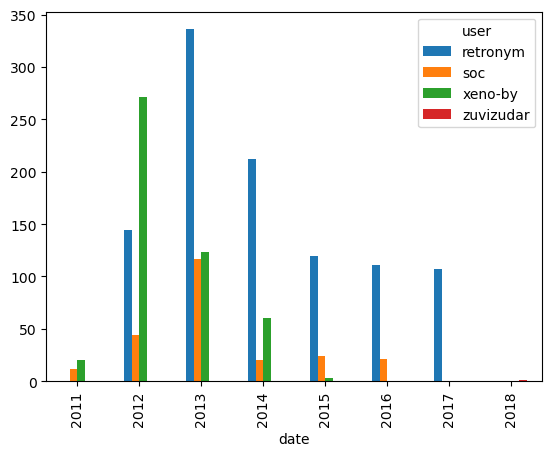

In [18]:
%matplotlib inline

# The developers we are interested in
authors = ['xeno-by', 'soc', 'retronym', 'zuvizudar']

# Getting all the developers' pull requests
by_author = pulls[pulls["user"].isin(authors)]

# Counting the number of pull requests submitted each year
counts = by_author.groupby([by_author['user'], by_author['date'].dt.year]).agg({'pid': 'count'}).reset_index()

# Converting the table to a wide format
counts_wide = counts.pivot_table(index='date', columns='user', values='pid', fill_value=0)

# Plotting the results
counts_wide.plot(kind="bar")

### Visualizing the contributions of each developer

<AxesSubplot:xlabel='date'>

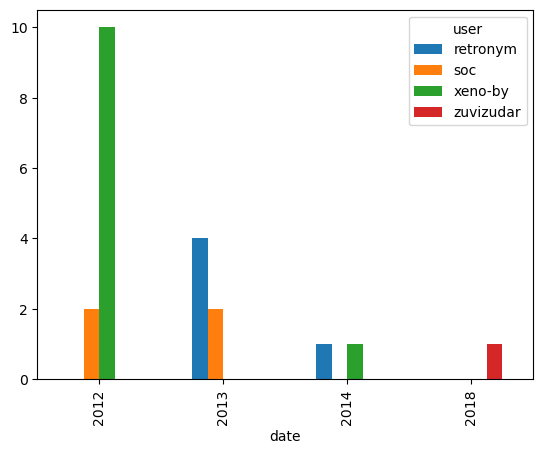

In [20]:
authors = ['xeno-by', 'soc', 'retronym', 'zuvizudar']
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Selecting the pull requests submitted by the authors, from the `data` DataFrame
by_author = data[data["user"].isin(authors)]

# Selecting the pull requests that affect the file
by_file = by_author[by_author["file"] == file]

# Grouping and counting the number of PRs done by each user each year
grouped = by_file.groupby(['user', by_file['date'].dt.year]).count()['pid'].reset_index()

# Transforming the data into pivot table
by_file_wide = grouped.pivot_table(index="date", columns="user", values="pid",  fill_value=0)

# Plotting the results
by_file_wide.plot(kind='bar')